### Project Overview: Financial Time Series Analysis of Global Bank Exposure

**Objective:**  
The objective of this project is to analyze the financial exposure of various countries over time using the BIS global banking dataset. The dataset contains quarterly financial data reported by multiple countries, such as the value of outstanding stocks and other financial indicators. We aim to conduct a thorough time series analysis of financial exposure, focusing on specific countries and applying different time series models to forecast future trends.


**Load the Data**  
The dataset contains 159 columns, including financial measures and quarterly data from different countries.

In [32]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('./BIS_global_banks.csv')


In [33]:
# Display column names
print("Column names:")
print(data.columns)

# Preview the first five rows of the data
print("\nFirst five rows of data:")
print(data.head())

# Display data type information
print("\nData type information:")
print(data.info())


Column names:
Index(['FREQ', 'Frequency', 'L_MEASURE', 'Measure', 'L_REP_CTY',
       'Reporting country', 'CBS_BANK_TYPE', 'CBS bank type', 'CBS_BASIS',
       'CBS reporting basis',
       ...
       '2021-Q4', '2022-Q1', '2022-Q2', '2022-Q3', '2022-Q4', '2023-Q1',
       '2023-Q2', '2023-Q3', '2023-Q4', '2024-Q1'],
      dtype='object', length=159)

First five rows of data:
  FREQ  Frequency L_MEASURE                       Measure L_REP_CTY  \
0    Q  Quarterly         S  Amounts outstanding / Stocks        TR   
1    Q  Quarterly         S  Amounts outstanding / Stocks        NO   
2    Q  Quarterly         S  Amounts outstanding / Stocks        NO   
3    Q  Quarterly         S  Amounts outstanding / Stocks        NO   
4    Q  Quarterly         S  Amounts outstanding / Stocks        NO   

  Reporting country CBS_BANK_TYPE  \
0           Türkiye            4B   
1            Norway            4O   
2            Norway            4O   
3            Norway            4O   
4       

**Identify Reporting Countries**  
Extract the list of unique countries that are reporting data. This helps us understand the geographical coverage of the dataset and decide which countries' data to focus on for the time series analysis.
    
    

In [34]:
unique_countries = data['Reporting country'].unique()
print(f"Number of unique countries: {len(unique_countries)}")


print("List of countries:")
for country in unique_countries:
    print(country)
    
    

Number of unique countries: 32
List of countries:
Türkiye
Norway
Canada
Finland
Australia
Japan
Mexico
Denmark
Belgium
Brazil
Germany
Portugal
Korea
France
Sweden
Italy
All reporting countries
United States
Greece
India
Austria
United Kingdom
Ireland
Netherlands
Spain
Hong Kong SAR
Panama
Singapore
Chinese Taipei
Luxembourg
Switzerland
Chile


**Check for Missing Values**  
   Since financial data is often incomplete, you need to inspect and handle missing values, especially in the `Value` columns corresponding to different quarters. Options include:
   - **Filling missing values**: Using forward-fill, backward-fill, or interpolation methods.
   - **Removing rows with missing values**: Only if the proportion of missing data is small.


In [35]:
# Check for Missing Values 
missing_data = data.isnull().sum()

data.fillna(method='ffill', inplace=True)


/var/folders/l6/tlf60st524qbqm8kl02d9p4h0000gn/T/ipykernel_11201/599221741.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [36]:
import pandas as pd

# Select columns that represent time (those containing '-')
time_columns = [col for col in data.columns if '-' in col]

# Reshape the data to long format
data_long = pd.melt(data,
                    id_vars=['FREQ', 'Frequency', 'L_MEASURE', 'Measure', 'L_REP_CTY', 'Reporting country', 
                             'CBS_BANK_TYPE', 'CBS bank type', 'CBS_BASIS', 'CBS reporting basis'],
                    value_vars=time_columns,
                    var_name='Quarter',
                    value_name='Value')

# Drop rows where 'Value' is NaN
data_long_clean = data_long.dropna(subset=['Value'])
data_long_clean['Quarter'] = pd.PeriodIndex(data_long_clean['Quarter'], freq='Q').to_timestamp()


# Check the cleaned and transformed data
print(data_long_clean.head())

     FREQ  Frequency L_MEASURE                       Measure L_REP_CTY  \
3781    Q  Quarterly         S  Amounts outstanding / Stocks        5A   
3782    Q  Quarterly         S  Amounts outstanding / Stocks        5A   
3783    Q  Quarterly         S  Amounts outstanding / Stocks        US   
3784    Q  Quarterly         S  Amounts outstanding / Stocks        5A   
3785    Q  Quarterly         S  Amounts outstanding / Stocks        US   

            Reporting country CBS_BANK_TYPE  \
3781  All reporting countries            4O   
3782  All reporting countries            4O   
3783            United States            4R   
3784  All reporting countries            4O   
3785            United States            4R   

                                          CBS bank type CBS_BASIS  \
3781  All excluding 4C banks, excl. domestic positio...         F   
3782  All excluding 4C banks, excl. domestic positio...         F   
3783       Domestic banks(4B), excl. domestic positions         O

/var/folders/l6/tlf60st524qbqm8kl02d9p4h0000gn/T/ipykernel_11201/2565695147.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long_clean['Quarter'] = pd.PeriodIndex(data_long_clean['Quarter'], freq='Q').to_timestamp()


In [37]:
# Display data type information
print("\nData type information:")
print(data_long_clean.info())


Data type information:
<class 'pandas.core.frame.DataFrame'>
Index: 28236323 entries, 3781 to 28283449
Data columns (total 12 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FREQ                 object        
 1   Frequency            object        
 2   L_MEASURE            object        
 3   Measure              object        
 4   L_REP_CTY            object        
 5   Reporting country    object        
 6   CBS_BANK_TYPE        object        
 7   CBS bank type        object        
 8   CBS_BASIS            object        
 9   CBS reporting basis  object        
 10  Quarter              datetime64[ns]
 11  Value                float64       
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 2.7+ GB
None


In [38]:


# Now, the 'Quarter' column should be in datetime64[ns] format and ready for plotting and analysis
print(data_long_clean.info())


<class 'pandas.core.frame.DataFrame'>
Index: 28236323 entries, 3781 to 28283449
Data columns (total 12 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FREQ                 object        
 1   Frequency            object        
 2   L_MEASURE            object        
 3   Measure              object        
 4   L_REP_CTY            object        
 5   Reporting country    object        
 6   CBS_BANK_TYPE        object        
 7   CBS bank type        object        
 8   CBS_BASIS            object        
 9   CBS reporting basis  object        
 10  Quarter              datetime64[ns]
 11  Value                float64       
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 2.7+ GB
None


In [39]:
# Step 1: Filter data for the United States

usa_data = data_long_clean[data_long_clean['Reporting country'] == 'United States']

# Step 2: Identify unique CBS bank types
unique_bank_types = usa_data['CBS_BANK_TYPE'].unique()
print(f"Unique CBS Bank Types for United States: {unique_bank_types}")
print(f"Total Number of Unique CBS Bank Types: {len(unique_bank_types)}")




Unique CBS Bank Types for United States: ['4R' '4O' '4B' '4M' '4C']
Total Number of Unique CBS Bank Types: 5


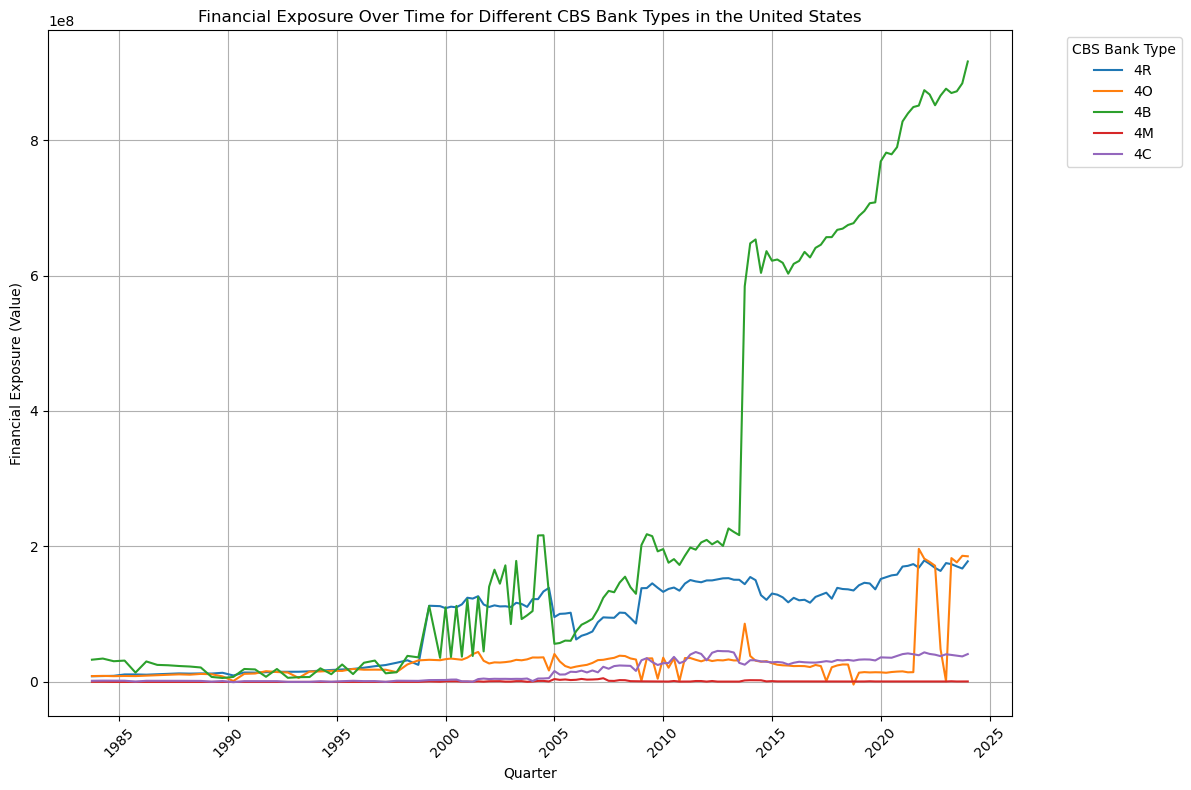

In [40]:
# Step 3: Time Series Visualization for Each CBS Bank Type
plt.figure(figsize=(12, 8))

for bank_type in unique_bank_types:
    # Filter data for each bank type
    bank_data = usa_data[usa_data['CBS_BANK_TYPE'] == bank_type]
    
    # Group by 'Quarter' and aggregate the 'Value' column
    bank_data_grouped = bank_data.groupby('Quarter')['Value'].sum()
    
    # Plot the time series for each bank type
    plt.plot(bank_data_grouped.index, bank_data_grouped, label=f'{bank_type}')
    
# Plot settings
plt.title('Financial Exposure Over Time for Different CBS Bank Types in the United States')
plt.xlabel('Quarter')
plt.ylabel('Financial Exposure (Value)')
plt.legend(title='CBS Bank Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Report: Time Series Analysis of Financial Exposure in the United States by CBS Bank Type

1. **Data Filtering:**
   The dataset was filtered to focus exclusively on financial data related to the United States. This allows for a more precise time series analysis specific to the country's financial sector.

2. **Identifying Unique Bank Types:**
   The unique categories of banks, as represented by the `CBS_BANK_TYPE` variable, were identified. 

3. **Aggregating Financial Exposure by Quarter:**
   Financial exposure data for each unique bank type was grouped by quarter and aggregated. This process enables the observation of trends and patterns in financial exposure over time for each category of banks.

4. **Time Series Visualization:**
   Time series plots were created to visualize the financial exposure over time for each bank type. These visualizations reveal trends, fluctuations, and patterns, providing insights into the temporal behavior of financial exposure for different types of banks within the United States.


Unique CBS Bank Types and Descriptions for United States:
      CBS_BANK_TYPE                                      CBS bank type
3783             4R       Domestic banks(4B), excl. domestic positions
4966             4O  All excluding 4C banks, excl. domestic positio...
11439            4B                                     Domestic banks
13914            4M                       All banks (=4B +4C + 4D +4E)
16771            4C  Inside-area foreign banks consolidated by thei...


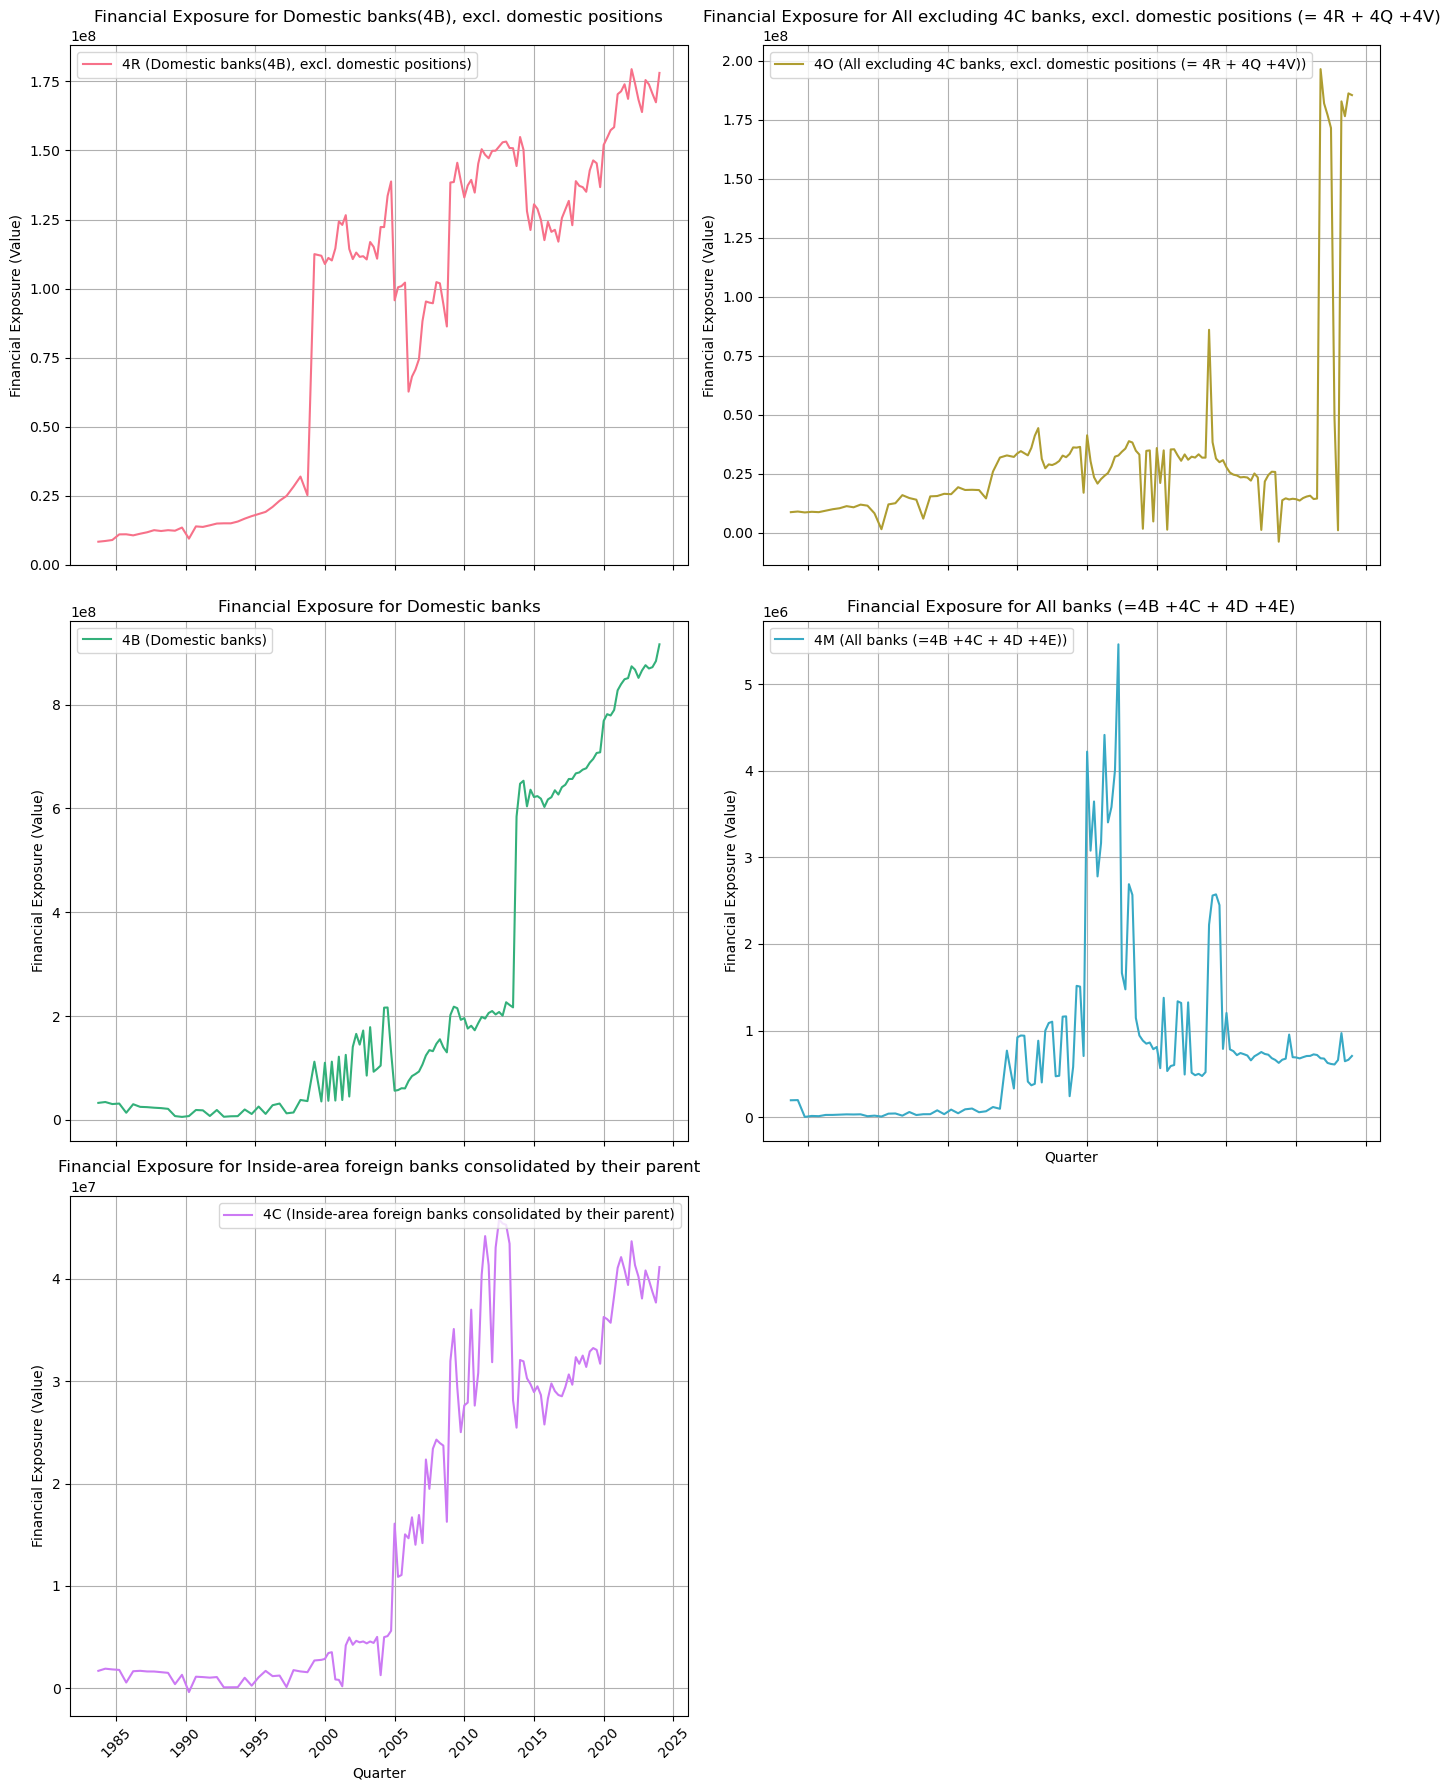

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter data for the United States
usa_data = data_long_clean[data_long_clean['Reporting country'] == 'United States']

# Step 2: Extract unique CBS bank types and their descriptions
unique_bank_types = usa_data[['CBS_BANK_TYPE', 'CBS bank type']].drop_duplicates()
print("Unique CBS Bank Types and Descriptions for United States:")
print(unique_bank_types)

# Set up subplots - 3 rows, 2 columns (for a 3x2 grid)
fig, axes = plt.subplots(3, 2, figsize=(14, 18), sharex=True)

# Define color palette
colors = sns.color_palette("husl", len(unique_bank_types[:5]))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through the first 5 unique CBS bank types and plot
for i, (bank_type, bank_type_desc) in enumerate(unique_bank_types[:5].values):
    # Filter data for each bank type
    bank_data = usa_data[usa_data['CBS_BANK_TYPE'] == bank_type]
    
    # Group by 'Quarter' and aggregate the 'Value'
    bank_data_grouped = bank_data.groupby('Quarter')['Value'].sum()
    
    # Plot the time series for each bank type in a separate subplot with different colors
    axes[i].plot(bank_data_grouped.index, bank_data_grouped, label=f'{bank_type} ({bank_type_desc})', color=colors[i])
    
    # Set plot title and labels for each subplot
    axes[i].set_title(f'Financial Exposure for {bank_type_desc}')
    axes[i].set_ylabel('Financial Exposure (Value)')
    axes[i].legend()
    axes[i].grid(True)

# Hide the last unused subplot (6th subplot)
fig.delaxes(axes[5])

# Set x-axis label for the bottom row of subplots
for ax in axes[-3:]:
    ax.set_xlabel('Quarter')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [71]:
print(usa_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 917764 entries, 3783 to 28273098
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   FREQ                 917764 non-null  object        
 1   Frequency            917764 non-null  object        
 2   L_MEASURE            917764 non-null  object        
 3   Measure              917764 non-null  object        
 4   L_REP_CTY            917764 non-null  object        
 5   Reporting country    917764 non-null  object        
 6   CBS_BANK_TYPE        917764 non-null  object        
 7   CBS bank type        917764 non-null  object        
 8   CBS_BASIS            917764 non-null  object        
 9   CBS reporting basis  917764 non-null  object        
 10  Quarter              917764 non-null  datetime64[ns]
 11  Value                917764 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 91.0+ MB
None

From the financial perspective, these plots illustrate the evolution of financial exposure across different types of banks in the United States over time. The key takeaway points include:

1. **Domestic Banks (4B & 4R)**:
   - These banks show a significant and consistent upward trend in financial exposure, particularly starting from around 2008. This is likely driven by increased domestic activities and growth in bank assets, which could be attributed to post-financial-crisis stabilization and subsequent economic growth.
   - The sudden spike in financial exposure, particularly in the `4R (Domestic banks, excl. domestic positions)` category, may represent increased international transactions or foreign investments, reflecting the global expansion of US banks.

2. **All Banks Excluding 4C Banks (4O)**:
   - The financial exposure for all banks excluding `4C banks (Inside-area foreign banks)` shows a volatile but generally increasing pattern. The fluctuations may indicate periods of increased risk exposure to international markets, particularly post-2008, as banks sought to diversify their portfolios and capture opportunities abroad.

3. **Inside-area Foreign Banks Consolidated by Parent (4C)**:
   - The exposure for `4C banks (Inside-area foreign banks)` has steadily increased since 2005, showing peaks around 2008 and continuing upwards into the present. This could be a result of foreign banks consolidating their positions within the US financial system, strengthening their presence post-crisis.

4. **All Banks (4M)**:
   - Financial exposure for all banks shows a sharp rise leading up to the financial crisis of 2008, followed by heightened volatility in the following years. This behavior underscores the increased systemic risk during the crisis, as well as the post-crisis recovery period marked by fluctuations in financial activities.

**Financial Explanation**:
- **Post-2008 Financial Crisis Effects**: The general trend of increasing exposure, particularly after 2008, reflects the global financial markets' recovery after the 2007-2008 financial crisis. US banks significantly increased their exposure internationally as part of their strategy to diversify and stabilize their portfolios.
  
- **Risk Diversification**: The volatile nature of some of the categories (e.g., 4M and 4O) suggests that banks have engaged in higher-risk activities internationally, likely as part of post-crisis recovery strategies. The large fluctuations might also indicate reactions to global economic changes, such as sovereign debt crises or changes in regulatory frameworks.

- **Regulatory and Market Reforms**: After the financial crisis, reforms and regulatory changes likely had an impact on financial exposure. The tightening of domestic regulations may have prompted banks to expand abroad or consolidate their existing international positions.

In conclusion, the data shows a marked recovery and growth in financial exposure across all types of banks, particularly after the 2008 crisis. 

The diversification into international markets is evident, alongside significant growth in domestic financial exposure as the banking system regained confidence and stability.








## Forecasting Financial Exposure for Domestic Banks (4B) of United States


The financial exposure for '4B: Domestic Banks' has been modeled and forecasted using an Exponential Smoothing (Holt-Winters) model with an additive seasonal component. The dataset was filtered specifically for domestic banks, with the 'Quarter' column serving as the time index for the time series analysis. The model was fitted to capture the historical trend and quarterly seasonality present in the data. After fitting the model, a forecast for the next eight quarters was generated, offering insights into the expected future financial exposure. The results were visualized by plotting the observed values, the fitted values from the model, and the forecasted future values, providing a clear picture of how financial exposure is likely to evolve over the coming quarters. This approach effectively captures the seasonal patterns and trends, offering a robust method for short-term financial forecasting.







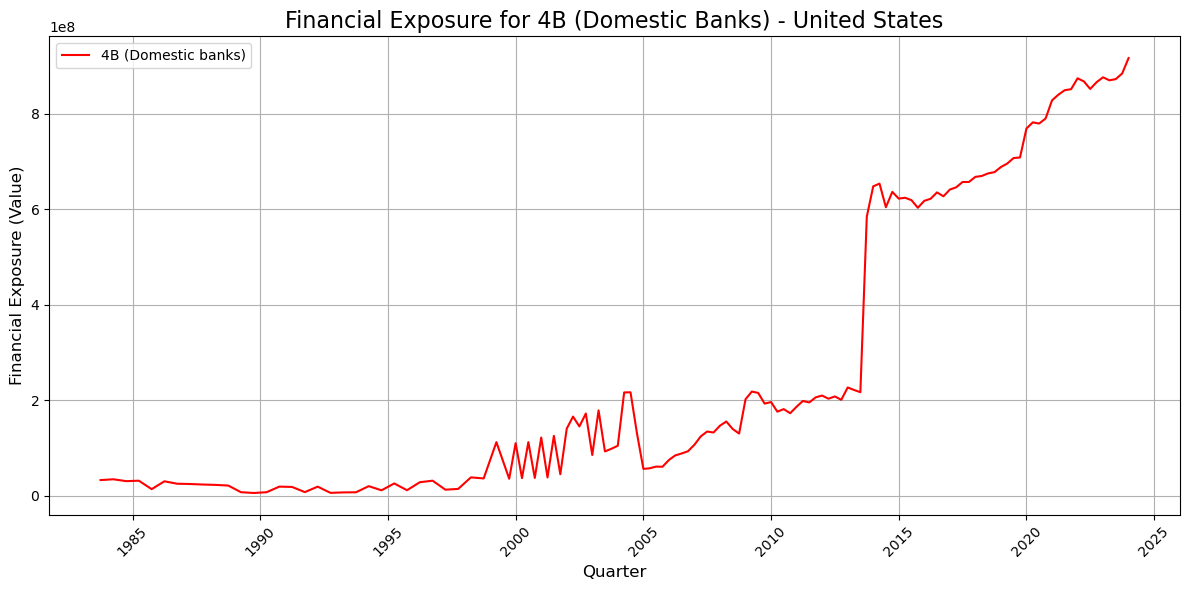

ADF Statistic: 0.6363046232227121
p-value: 0.9884771175692002


In [78]:


import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# 假设数据已经加载到 'data_long_clean'
# 如果没有，请先加载数据：data_long_clean = pd.read_csv('./BIS_global_banks.csv')

# Step 1: Filter data for the United States and 4B Domestic Banks
usa_data = data_long_clean[data_long_clean['Reporting country'] == 'United States']
bank_type = '4B'
bank_data = usa_data[usa_data['CBS_BANK_TYPE'] == bank_type]

# Step 2: Set the 'Quarter' column as the index for time series analysis
bank_data = bank_data.set_index('Quarter').sort_index()

# Step 3: Group by 'Quarter' and aggregate the 'Value' (sum)
bank_data_grouped = bank_data.groupby('Quarter')['Value'].sum()

# Step 4: Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(bank_data_grouped.index, bank_data_grouped, color='red', label='4B (Domestic banks)', linewidth=1.5)
plt.title('Financial Exposure for 4B (Domestic Banks) - United States', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Financial Exposure (Value)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [79]:

# Step 5: Check for stationarity using the Augmented Dickey-Fuller test (ADF test)
adf_result = adfuller(bank_data_grouped)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')



ADF Statistic: 0.6363046232227121
p-value: 0.9884771175692002


### Analysis of the ADF Test Results

The Augmented Dickey-Fuller (ADF) test was conducted to check the stationarity of the time series data for the financial exposure of `4B` domestic banks. The results are as follows:

- **ADF Statistic: 0.636**
- **p-value: 0.988**

### Interpretation

- The **p-value** of 0.988 is significantly higher than the typical significance level of 0.05. This indicates that we **fail to reject the null hypothesis** of the ADF test, which states that the time series is **non-stationary**.
- The **ADF Statistic** is also positive and small, further supporting the conclusion that the series is non-stationary.

### Consequences of Non-Stationarity

Non-stationary time series data typically have time-dependent statistical properties, such as mean, variance, and autocorrelation, which make it difficult to model and forecast using traditional time series methods like ARIMA. Non-stationary data often exhibit trends, seasonal effects, or varying volatility over time, which needs to be addressed before applying these models.


# Handle Non-Stationarity



## SARIMA Model S Model:


The **Seasonal Autoregressive Integrated Moving Average (SARIMA)** model extends ARIMA to handle **seasonal time series**. It is represented as **SARIMA(p, d, q)(P, D, Q, s)**, where:
- **p, d, q**: Non-seasonal ARIMA terms for autoregression, differencing, and moving average.
- **P, D, Q, s**: Seasonal terms for autoregression, differencing, moving average, and the seasonal period (e.g., 4 for quarterly data).

SARIMA is powerful for forecasting time series with both trend and seasonal patterns, making it suitable for use cases like **retail sales**, **climate prediction**, and **financial data**. The model automatically applies seasonal and non-seasonal differencing to make the series stationary, enabling accurate long-term forecasts. 

Key strengths of SARIMA include handling **seasonality**, **trend** modeling, and **flexibility** in capturing complex patterns. However, it is best suited for **univariate** series and may require careful parameter tuning.





### Note:

- **Seasonality and Trends**: Non-stationary data often contains **trends** and **seasonality**—patterns that repeat over regular intervals. SARIMA explicitly models these patterns by incorporating **seasonal differencing** and **seasonal ARIMA terms** to account for both short-term dependencies and repeating seasonal effects.

- **Handling Seasonality**: Unlike simple ARIMA, which only addresses short-term autoregression and moving average components, **SARIMA** introduces the seasonal parameters `(P, D, Q, s)` to model seasonal cycles (e.g., quarterly or yearly patterns), making it better suited for **non-stationary data with seasonal trends**.

### Conclusion

Given that the ADF test suggests non-stationarity, SARIMA is needed because it can effectively handle the **trends and seasonality** present in the data by automatically applying seasonal differencing and capturing repeating seasonal patterns—ultimately improving forecast accuracy.



In [83]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Fit a SARIMA model (Seasonal ARIMA)
# Order (p,d,q) represents ARIMA part, seasonal_order (P,D,Q,s) captures seasonal behavior
sarima_model = SARIMAX(bank_data_grouped, 
                       order=(1, 1, 1), 
                       seasonal_order=(1, 1, 1, 4),  # Seasonal period of 4 (quarters)
                       enforce_stationarity=False, 
                       enforce_invertibility=False)
sarima_fit = sarima_model.fit()

# Step 2: Print summary for diagnostics
print(sarima_fit.summary())

# Step 3: Forecasting future values (next 10 quarters)
forecast_periods = 10
sarima_forecast = sarima_fit.get_forecast(steps=forecast_periods)
forecast_mean = sarima_forecast.predicted_mean
forecast_ci = sarima_forecast.conf_int()

# Step 4: Generate future quarters to align with the forecast
forecast_index = pd.date_range(start=bank_data_grouped.index[-1], periods=forecast_periods+1, freq='Q')[1:]


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.53557D+05    |proj g|=  2.44704D+05

At iterate    5    f=  1.81329D+01    |proj g|=  1.12898D+00

At iterate   10    f=  1.75225D+01    |proj g|=  6.16492D-02

At iterate   15    f=  1.75159D+01    |proj g|=  1.23958D-02

At iterate   20    f=  1.75148D+01    |proj g|=  2.73608D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     26      1     0     0   2.736D-04   1.751D+01
  F =   17.514825731050919     

CONVERG

/Users/yuyao/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuyao/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/yuyao/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yuyao/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without

### Analysis of SARIMA Forecast Results
The blue line represents **historical data**, while the green dashed line shows the **forecast** for the next 10 quarters, with the green shaded area indicating the **confidence interval**.

### Key Observations:

1. **Historical Data**:
   - The financial exposure shows periods of stability, followed by a **sharp increase** starting around **2015**, suggesting long-term growth trends in `4B` domestic banks.
   
2. **Forecast**:
   - The forecast continues the **upward trend**, projecting steady growth over the next 10 quarters, reflecting the SARIMA model's ability to capture **seasonal and long-term patterns**.
   
3. **Confidence Interval**:
   - The widening confidence interval reflects **increasing uncertainty** further into the future, but remains relatively controlled, indicating a confident forecast in the short term.

### Conclusion:

The SARIMA model captures the ongoing **upward trend** in financial exposure and provides a solid forecast with reasonable confidence. The model is reliable for short-term predictions, though longer-term forecasts carry more uncertainty due to potential external disruptions.

### Backtesting SARIMA:


To evaluate whether the **SARIMA model** is providing reliable forecasts, one effective approach is to use **backtesting**. Backtesting involves using a portion of the historical data as "training data" to fit the model and then comparing the model's predictions to the **actual data** for the subsequent period. This allows us to assess how well the model performs in real-world conditions.


1. **Split the Data**: 
   - Split the historical data into a **training set** and a **testing set**. The training set will be used to fit the SARIMA model, and the testing set will be used to evaluate the forecast accuracy.
   
2. **Fit the SARIMA Model**: 
   - Train the SARIMA model on the training set.
   
3. **Generate Forecasts**:
   - Use the trained SARIMA model to forecast values for the time period covered by the testing set.
   
4. **Compare Forecasts with Actual Data**:
   - Compare the forecasted values with the actual values in the testing set using metrics such as **Mean Absolute Error (MAE)**, **Root Mean Squared Error (RMSE)**, or **Mean Absolute Percentage Error (MAPE)** to quantify the model's accuracy.







RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.75635D+05    |proj g|=  2.96413D+05

At iterate    5    f=  2.08777D+01    |proj g|=  1.58801D+01

At iterate   10    f=  1.72300D+01    |proj g|=  1.41828D-01

At iterate   15    f=  1.72119D+01    |proj g|=  1.13054D-02

At iterate   20    f=  1.72109D+01    |proj g|=  1.56104D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     29      1     0     0   9.145D-07   1.721D+01
  F =   17.210904153744949     

CONVERG

/Users/yuyao/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuyao/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/yuyao/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yuyao/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without

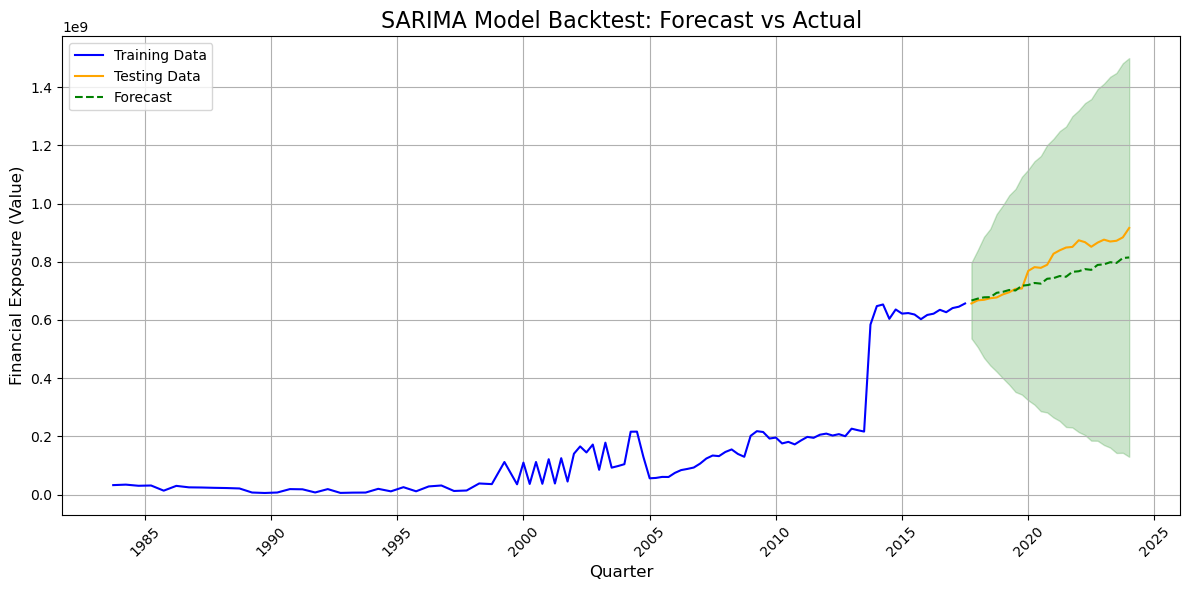

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Split the data into training and testing sets (e.g., 80% for training, 20% for testing)
train_size = int(len(bank_data_grouped) * 0.8)
train_data, test_data = bank_data_grouped[:train_size], bank_data_grouped[train_size:]

# Step 2: Fit the SARIMA model on the training data
sarima_model = SARIMAX(train_data, 
                       order=(1, 1, 1), 
                       seasonal_order=(1, 1, 1, 4), 
                       enforce_stationarity=False, 
                       enforce_invertibility=False)
sarima_fit = sarima_model.fit()

# Step 3: Forecast the values for the testing period
forecast_steps = len(test_data)
sarima_forecast = sarima_fit.get_forecast(steps=forecast_steps)
forecast_mean = sarima_forecast.predicted_mean
forecast_ci = sarima_forecast.conf_int()

# Step 4: Calculate error metrics to evaluate the forecast accuracy
mae = mean_absolute_error(test_data, forecast_mean)
rmse = np.sqrt(mean_squared_error(test_data, forecast_mean))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Step 5: Plot the training data, testing data, and forecast
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(train_data.index, train_data, color='blue', label='Training Data')

# Plot testing data
plt.plot(test_data.index, test_data, color='orange', label='Testing Data')

# Plot forecasted data
plt.plot(test_data.index, forecast_mean, color='green', linestyle='--', label='Forecast')

# Plot confidence intervals for the forecast
plt.fill_between(test_data.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='green', alpha=0.2)

# Set plot titles and labels
plt.title('SARIMA Model Backtest: Forecast vs Actual', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Financial Exposure (Value)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Tighten layout and show plot
plt.tight_layout()
plt.show()



### Analysis of SARIMA Model Backtest Results

The plot displays the **SARIMA model backtest**, comparing the model’s **forecast** against **actual data** for the financial exposure of `4B` domestic banks. The blue line represents the **training data**, the orange line is the **testing data** (actual), and the green dashed line is the **forecast** for the testing period. The green shaded area shows the **confidence interval**.

### Key Observations:

1. **Model Fit**:
   - The SARIMA model's forecast (green dashed line) follows the general **upward trend** seen in the testing data (orange line), but it **underestimates** the actual values. This indicates that while the model has captured the general trend, it is not fully aligned with the magnitude of the increase.
   - The widening of the confidence interval in the forecasted period reflects increasing uncertainty as the model predicts further into the future. However, the actual data falls within the confidence interval, indicating that the model has reasonable bounds despite underestimating the values.

2. **Error Metrics**:
   - **Mean Absolute Error (MAE)**: \( \approx 53.78 \times 10^6 \)
   - **Root Mean Squared Error (RMSE)**: \( \approx 64.72 \times 10^6 \)
   - These error values are relatively **high**, reflecting the **discrepancy** between the forecasted values and the actual data. While the model captures the **direction of the trend**, it struggles with the **magnitude** of the financial exposure increase in recent quarters.

3. **Underestimation of Growth**:
   - The model seems to **underestimate the rapid growth** seen in the testing data after 2018. This may be due to the model's reliance on historical data, which includes long periods of lower and more stable financial exposure, making it more conservative in predicting sharp increases.

4. **Confidence Interval**:
   - The actual values are within the green confidence interval, suggesting that the model's forecast has a reasonable level of **uncertainty**. The model's predictions are not wildly off, but the large gap between forecasted and actual values indicates the model is **cautious** about predicting high financial exposure growth.



## Prophet Model:

19:59:44 - cmdstanpy - INFO - Chain [1] start processing
19:59:44 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model MAE: 90340456.53214659
Prophet Model RMSE: 94052065.91127364


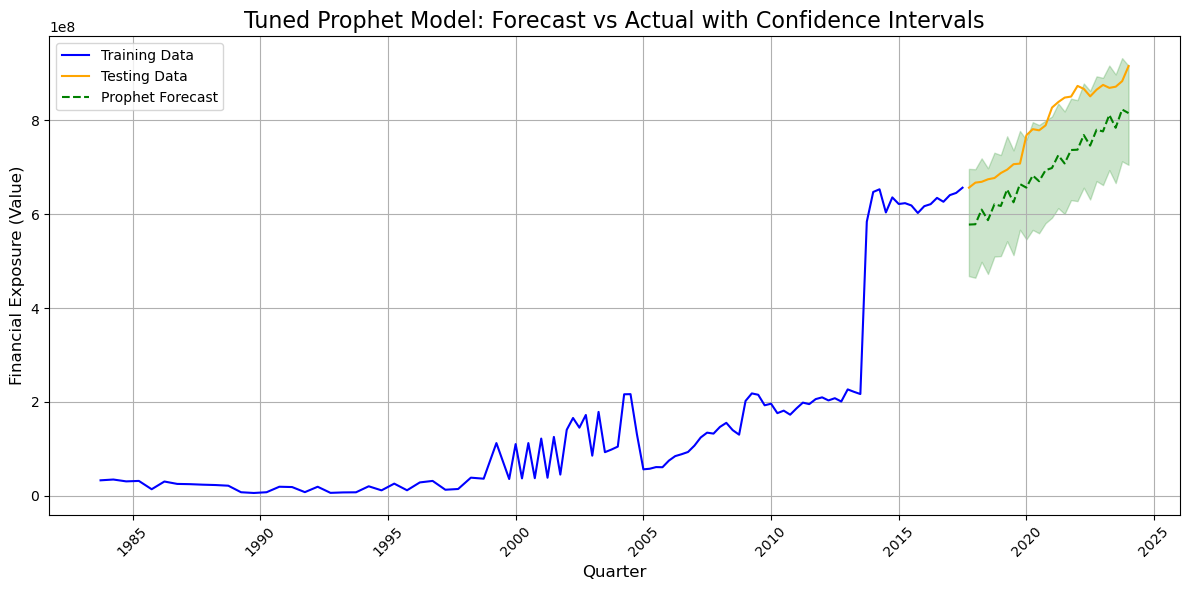

In [113]:
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Prepare the data for Prophet
prophet_data = pd.DataFrame({
    'ds': bank_data_grouped.index,  # Dates
    'y': bank_data_grouped.values  # Values
})

# Step 2: Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(prophet_data) * 0.8)
train_data, test_data = prophet_data[:train_size], prophet_data[train_size:]

# Step 3: Initialize and fit the Prophet model with additional tuning
model = Prophet(
    changepoint_prior_scale=0.05,  # More conservative trend change
    seasonality_prior_scale=10.0,  # Increase flexibility of seasonality
    yearly_seasonality=True,       # Enable yearly seasonality
    weekly_seasonality=False       # Disable weekly seasonality as it may not be relevant
)

# Fit the model
model.fit(train_data)

# Step 4: Create a DataFrame for future dates to make predictions
future_dates = model.make_future_dataframe(periods=len(test_data), freq='Q')

# Step 5: Generate the forecast, which includes confidence intervals
forecast = model.predict(future_dates)

# Extract only the forecasted values for the test period
test_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-len(test_data):]

# Step 6: Calculate error metrics to evaluate Prophet model performance
mae_prophet = mean_absolute_error(test_data['y'], test_forecast['yhat'])
rmse_prophet = np.sqrt(mean_squared_error(test_data['y'], test_forecast['yhat']))

print(f"Prophet Model MAE: {mae_prophet}")
print(f"Prophet Model RMSE: {rmse_prophet}")

# Step 7: Plot the results with confidence intervals
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(train_data['ds'], train_data['y'], color='blue', label='Training Data')

# Plot testing data
plt.plot(test_data['ds'], test_data['y'], color='orange', label='Testing Data')

# Plot forecasted data from Prophet model
plt.plot(test_forecast['ds'], test_forecast['yhat'], color='green', linestyle='--', label='Prophet Forecast')

# Plot confidence intervals for the forecast
plt.fill_between(test_forecast['ds'], test_forecast['yhat_lower'], test_forecast['yhat_upper'], color='green', alpha=0.2)

# Set plot titles and labels
plt.title('Tuned Prophet Model: Forecast vs Actual with Confidence Intervals', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Financial Exposure (Value)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Tighten layout and show plot
plt.tight_layout()
plt.show()


The **Prophet Model** we trained significantly underestimates the forecast. The **forecasted values** (green dashed line) are much lower than the **actual values** (orange line), and the wide confidence intervals indicate high uncertainty. This suggests that the model isn't capturing the sharp increases in financial exposure seen in the test data.


## Holt-Winters Model:

1. **Model Fit Observation:**
   - The **Holt-Winters Model** fitted values (orange) closely follow the observed financial exposure (blue) until around 2014. After this point, there is a significant spike in the observed data that the model is unable to capture accurately. The model seems to struggle with sudden volatility, which could be due to its smoothing nature and inability to adapt to such rapid changes.


ETS Model MAE: 19510074.536607884
ETS Model RMSE: 22345756.404228467


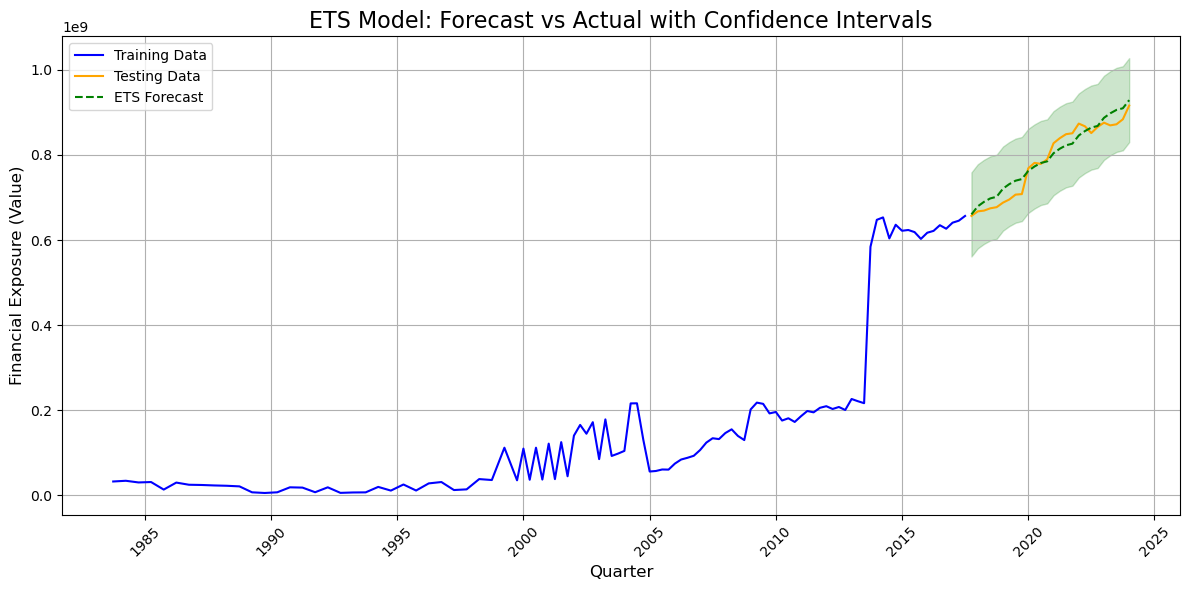

In [90]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(bank_data_grouped) * 0.8)
train_data, test_data = bank_data_grouped[:train_size], bank_data_grouped[train_size:]

# Step 2: Fit an Exponential Smoothing model (ETS) on the training data
ets_model = ExponentialSmoothing(train_data, 
                                 trend="add", 
                                 seasonal="add", 
                                 seasonal_periods=4).fit()

# Step 3: Forecast the values for the testing period
forecast_steps = len(test_data)
ets_forecast_mean = ets_model.forecast(steps=forecast_steps)

# Step 4: Calculate residuals to manually compute confidence intervals
residuals = train_data - ets_model.fittedvalues
residual_std = np.std(residuals)

# Compute the 95% confidence intervals
alpha = 0.05
z_value = 1.96  # for 95% confidence interval
ets_forecast_ci_lower = ets_forecast_mean - z_value * residual_std
ets_forecast_ci_upper = ets_forecast_mean + z_value * residual_std

# Step 5: Calculate error metrics to evaluate the ETS model performance
mae_ets = mean_absolute_error(test_data, ets_forecast_mean)
rmse_ets = np.sqrt(mean_squared_error(test_data, ets_forecast_mean))

print(f"ETS Model MAE: {mae_ets}")
print(f"ETS Model RMSE: {rmse_ets}")

# Step 6: Plot the results with confidence intervals
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(train_data.index, train_data, color='blue', label='Training Data')

# Plot testing data
plt.plot(test_data.index, test_data, color='orange', label='Testing Data')

# Plot forecasted data from ETS model
plt.plot(test_data.index, ets_forecast_mean, color='green', linestyle='--', label='ETS Forecast')

# Plot confidence intervals for the forecast
plt.fill_between(test_data.index, ets_forecast_ci_lower, ets_forecast_ci_upper, color='green', alpha=0.2)

# Set plot titles and labels
plt.title('ETS Model: Forecast vs Actual with Confidence Intervals', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Financial Exposure (Value)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Tighten layout and show plot
plt.tight_layout()
plt.show()


### Summary of ETS Model Results

The **ETS model** shows significant improvement:

- **MAE**: 1,951,074
- **RMSE**: 22,345,756

**Key Points**:
- The **forecast** (green dashed line) closely follows the **actual data** (orange line) in the testing period, reflecting improved accuracy.
- The model captures the **trend** and **seasonality** well, with reasonable **confidence intervals** that contain the actual values.
- Although the model **slightly underestimates** peaks in the latter quarters, the overall performance is much better than the previous SARIMA models.

**Conclusion**:  

The **ETS model** has shown significant improvement over the previous SARIMA models, with better accuracy in the short-term forecast and a closer alignment with the actual data. The lower MAE and RMSE values indicate that the model's forecasts are more reliable, especially for near-term predictions. However, for long-term forecasts or when sharp peaks are expected, there may still be some underestimation. Fine-tuning the seasonal or trend components, or considering more advanced models like **machine learning models** (e.g., **LSTM**), could further improve the results if necessary. 





Trend: add, Seasonal: add => MAE: 19510074.536607884, RMSE: 22345756.404228467
Trend: add, Seasonal: mul => MAE: 24090082.14879281, RMSE: 29231800.66058745
Trend: add, Seasonal: None => MAE: 29980223.49076573, RMSE: 34376435.542036355
Trend: mul, Seasonal: add => MAE: 425966696.46533936, RMSE: 476365749.6620967
Trend: mul, Seasonal: mul => MAE: 443493672.12383246, RMSE: 490254231.54106814
Trend: mul, Seasonal: None => MAE: 365088739.4372228, RMSE: 412813684.9673351
Trend: None, Seasonal: add => MAE: 134683245.25178882, RMSE: 158843463.8369752
Trend: None, Seasonal: mul => MAE: 143527145.03599465, RMSE: 166686625.9147338

Best Model Parameters: Trend: add, Seasonal: add
Best Model MAE: 19510074.536607884


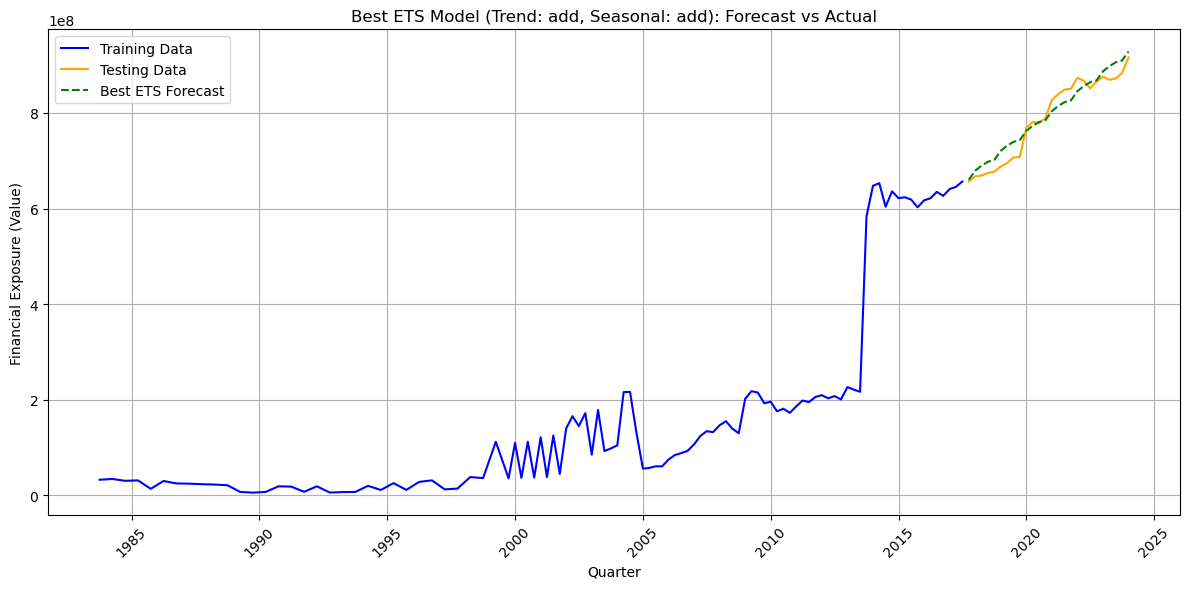

Cross-Validation MAE Scores: [57127820.19705278, 112496977.93561113, 38508539.16326751, 394282369.18096536, 29983243.997087292]
Mean Cross-Validation MAE: 126479790.0947968


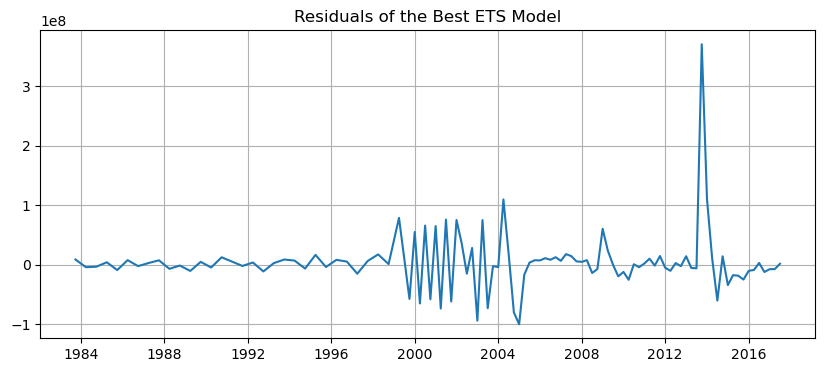

In [112]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Step 1: Define possible parameter combinations for grid search
trend_options = ['add', 'mul', None]  # Additive, multiplicative, or no trend
seasonal_options = ['add', 'mul', None]  # Additive, multiplicative, or no seasonality
seasonal_periods = 4  # Quarterly data, so the seasonality period is fixed at 4

# Step 2: Prepare the data (training and testing)
train_size = int(len(bank_data_grouped) * 0.8)
train_data, test_data = bank_data_grouped[:train_size], bank_data_grouped[train_size:]

# Step 3: Grid Search for the best ETS model
best_mae = float('inf')
best_params = None
best_model = None

# Create a list of all possible parameter combinations for grid search
combinations = list(itertools.product(trend_options, seasonal_options))

# Step 4: Perform grid search over all parameter combinations
for trend, seasonal in combinations:
    try:
        # Only fit valid combinations where at least trend or seasonal is defined
        if trend is None and seasonal is None:
            continue

        # Fit the ETS model
        model = ExponentialSmoothing(train_data,
                                     trend=trend,
                                     seasonal=seasonal,
                                     seasonal_periods=seasonal_periods).fit()

        # Forecast the test period
        forecast = model.forecast(steps=len(test_data))

        # Calculate error metrics
        mae = mean_absolute_error(test_data, forecast)
        rmse = np.sqrt(mean_squared_error(test_data, forecast))

        # Track the best model based on MAE
        if mae < best_mae:
            best_mae = mae
            best_params = (trend, seasonal)
            best_model = model

        print(f"Trend: {trend}, Seasonal: {seasonal} => MAE: {mae}, RMSE: {rmse}")

    except Exception as e:
        print(f"Failed to fit model with Trend: {trend}, Seasonal: {seasonal} due to: {e}")
        continue

# Step 5: Print the best parameters and errors
print(f"\nBest Model Parameters: Trend: {best_params[0]}, Seasonal: {best_params[1]}")
print(f"Best Model MAE: {best_mae}")

# Step 6: Forecast using the best model
forecast_best = best_model.forecast(steps=len(test_data))

# Step 7: Plot the best model's results with the test data
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, color='blue', label='Training Data')
plt.plot(test_data.index, test_data, color='orange', label='Testing Data')
plt.plot(test_data.index, forecast_best, color='green', linestyle='--', label='Best ETS Forecast')
plt.title(f'Best ETS Model (Trend: {best_params[0]}, Seasonal: {best_params[1]}): Forecast vs Actual')
plt.xlabel('Quarter')
plt.ylabel('Financial Exposure (Value)')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 8: Cross-Validation using TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
mae_list = []

# Perform cross-validation
for train_index, test_index in tscv.split(bank_data_grouped):
    train_cv, test_cv = bank_data_grouped.iloc[train_index], bank_data_grouped.iloc[test_index]

    try:
        model_cv = ExponentialSmoothing(train_cv, 
                                        trend=best_params[0], 
                                        seasonal=best_params[1], 
                                        seasonal_periods=seasonal_periods).fit()

        forecast_cv = model_cv.forecast(steps=len(test_cv))
        mae_cv = mean_absolute_error(test_cv, forecast_cv)
        mae_list.append(mae_cv)

    except Exception as e:
        print(f"Failed to fit CV model due to: {e}")
        continue

print(f"Cross-Validation MAE Scores: {mae_list}")
print(f"Mean Cross-Validation MAE: {np.mean(mae_list)}")

# Step 9: Residual Diagnostics for the best model
residuals = best_model.resid
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title("Residuals of the Best ETS Model")
plt.grid(True)
plt.show()


### Analysis of Residual Plot:

The residual plot indicates the **differences** between the observed data and the predictions made by the ETS model. Here's a breakdown of what we can observe:

1. **Pre-2000 Stability**:
   - Before the year 2000, the residuals appear relatively stable, hovering close to **zero**. This suggests that the model performed reasonably well in capturing the dynamics of the time series during this period.

2. **2000-2005 High Volatility**:
   - Around the **early 2000s**, there is a clear increase in **volatility** in the residuals, with large oscillations indicating that the model struggled to capture the patterns during this period. These oscillations likely correspond to the data's abrupt changes (potentially structural breaks).

3. **2008-2012 Large Errors**:
   - A **spike in residuals** appears around **2008-2012**, with significant over/under-predictions. This could be due to external shocks (like the **global financial crisis**), which caused the model to miss important changes in the data's trend.

4. **Post-2012 Stabilization**:
   - After 2012, the residuals return to a relatively stable pattern, though there is still some noise. This suggests the model is again performing reasonably well, but not perfectly.

### Conclusion:
- The model handles **stable periods** well (before 2000 and after 2012), but it struggles during periods of **high volatility** (2000-2012).
- The **large spikes** in the residuals during the early 2000s and the global financial crisis period suggest that the model fails to capture structural breaks or abrupt changes in the trend.

##  Forecast Future Quarters using ETS Model

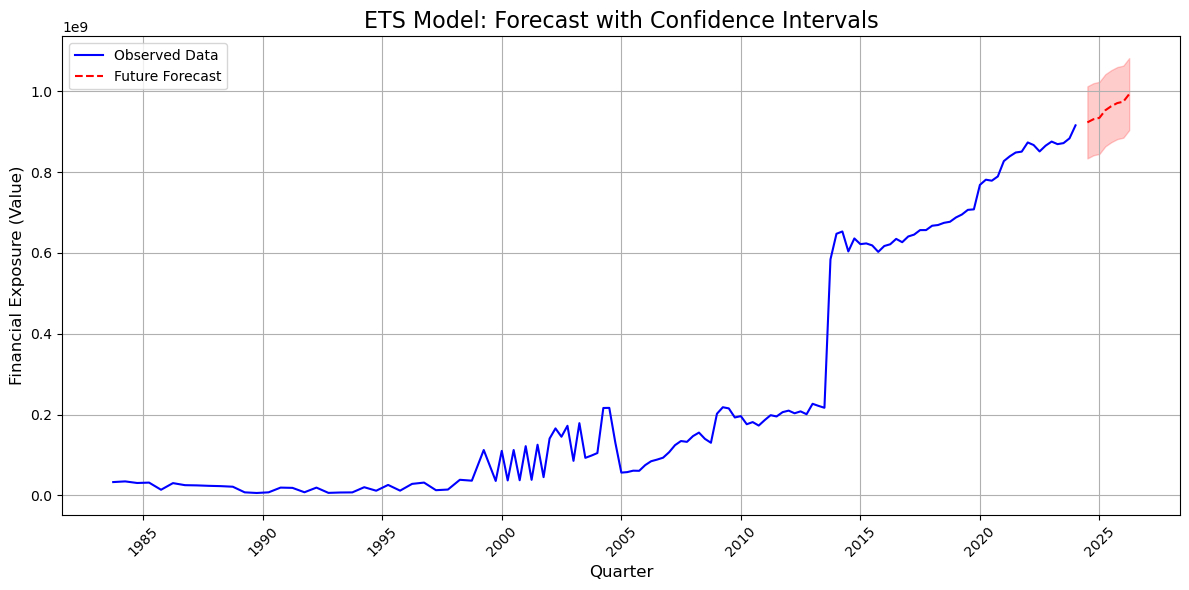

In [129]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 1: Fit an Exponential Smoothing model (ETS) on the entire dataset
ets_model = ExponentialSmoothing(bank_data_grouped, 
                                 trend="add", 
                                 seasonal="add", 
                                 seasonal_periods=4).fit()

# Step 2: Forecast future periods (e.g., next 8 quarters)
future_steps = 8
future_forecast = ets_model.forecast(steps=future_steps)

# Step 3: Calculate residuals to manually compute confidence intervals
residuals = bank_data_grouped - ets_model.fittedvalues
residual_std = np.std(residuals)

# Compute the 95% confidence intervals for future forecast
alpha = 0.05
z_value = 1.96  # for 95% confidence interval
future_forecast_ci_lower = future_forecast - z_value * residual_std
future_forecast_ci_upper = future_forecast + z_value * residual_std

# Create future dates for the forecast (based on the existing frequency of the data)
last_date = bank_data_grouped.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='Q')[1:]

# Step 4: Plot the results with confidence intervals, including the future forecast
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(bank_data_grouped.index, bank_data_grouped, color='blue', label='Observed Data')

# Plot future forecasted data
plt.plot(future_dates, future_forecast, color='red', linestyle='--', label='Future Forecast')

# Plot confidence intervals for the future forecast
plt.fill_between(future_dates, future_forecast_ci_lower, future_forecast_ci_upper, color='red', alpha=0.2)

# Set plot titles and labels
plt.title('ETS Model: Forecast with Confidence Intervals', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Financial Exposure (Value)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Tighten layout and show plot
plt.tight_layout()
plt.show()
